<a href="https://colab.research.google.com/github/pankajroy97/OIBSIP/blob/main/Email_Spam_Detection_With_Machine_Learning(OIBSIP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.drop(df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],axis=1,inplace=True)

In [ ]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
e=stopwords.words('english')
e

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from string import punctuation
p=punctuation

In [ ]:
import nltk 
nltk.download('punkt')                             
def func(x):
  x=x.lower()
  x=nltk.word_tokenize(x) 
  arr=[] 
  for i in x:                                                     ######import nltk word_tokenize labraries to convert sentence word to list 
   if i not in stopwords.words('english') and i not in p:
    arr.append(i)                                   
  return " ".join(arr)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['sms_transform']=df['sms'].apply(func)

In [ ]:
df.head()

,class,sms,sms_transform
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy .. available bugis n gre...
1,ham,Ok lar... Joking wif u oni...,ok lar ... joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor ... u c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah n't think goes usf lives around though


<Axes: xlabel='class', ylabel='count'>

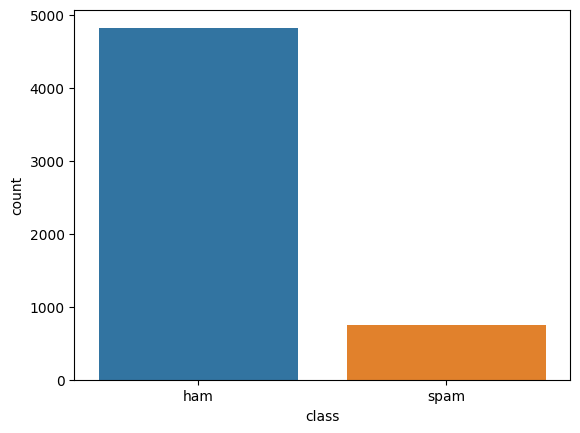

In [ ]:
sns.countplot(x=df['class'],label=['ham','spam'])

In [ ]:
#Extract length of all characters,words and sentances from text data
import nltk
nltk.download('punkt')
df['num_char']=df['sms'].apply(len)
from nltk.tokenize import word_tokenize
df['num_words']=df['sms'].apply(lambda x:len(word_tokenize(x)))
from nltk.tokenize import sent_tokenize
df['num_sent']=df['sms'].apply(lambda x:len(sent_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

,class,sms,sms_transform,num_char,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy .. available bugis n gre...,111,24,2
1,ham,Ok lar... Joking wif u oni...,ok lar ... joking wif u oni ...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2
3,ham,U dun say so early hor... U c already then say...,u dun say early hor ... u c already say ...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah n't think goes usf lives around though,61,15,1


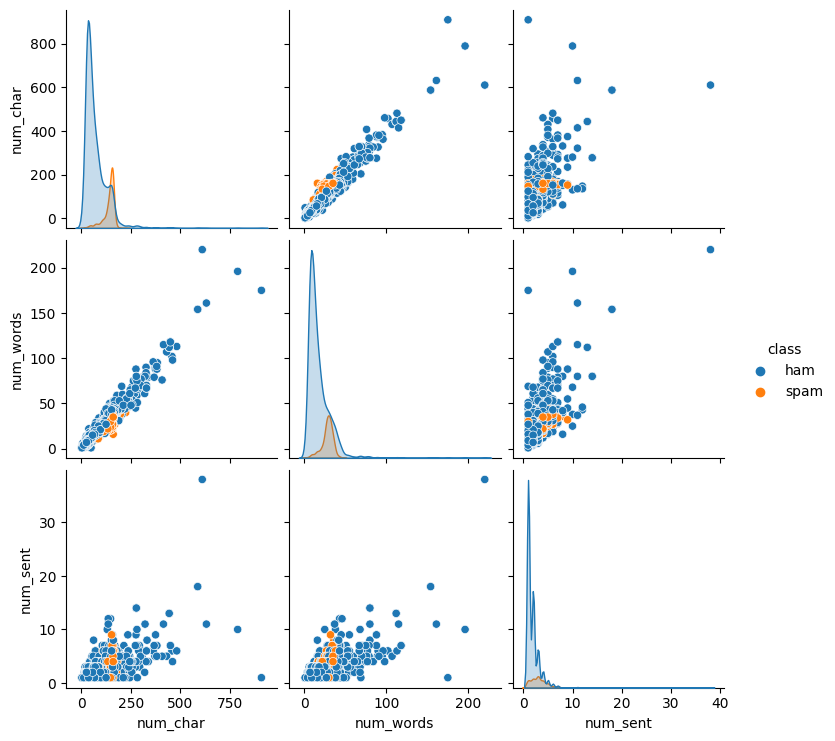

In [ ]:
sns.pairplot(df,hue='class')

In [ ]:
df1=df[['sms_transform','class']]
df1

,sms_transform,class
0,go jurong point crazy .. available bugis n gre...,ham
1,ok lar ... joking wif u oni ...,ham
2,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,u dun say early hor ... u c already say ...,ham
4,nah n't think goes usf lives around though,ham
...,...,...
5567,2nd time tried 2 contact u. u å£750 pound priz...,spam
5568,ì_ b going esplanade fr home,ham
5569,pity mood ... suggestions,ham
5570,guy bitching acted like 'd interested buying s...,ham


In [ ]:
#Select dependent and independent column
x=df1['sms_transform']
y=df1['class']

In [ ]:
#Split the data as training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900,)
(1672,)
(3900,)
(1672,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
feature_extraction = TfidfVectorizer(max_df=0.7, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(x_train)
X_test_features = feature_extraction.transform(x_test)

METHOD-1:LOGESTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train_features,y_train)

LogisticRegression()

In [ ]:
prediction=model_LR.predict(X_train_features)
from sklearn.metrics import accuracy_score
print("Accuracy of training data",accuracy_score(y_train,prediction)*100)

Accuracy of training data 96.35897435897436


In [ ]:
prediction1=model_LR.predict(X_test_features)
print("Accuracy of testing data",accuracy_score(y_test,prediction1)*100)

Accuracy of testing data 96.83014354066985


In [ ]:
x_test

4202                c movie juz last minute decision mah juz watch...
4241                show ur colours euro 2004 2-4-1 offer get engl...
4984                                     dont let studying stress l8r
320                               merry christmas babe love ya kisses
5498                                                          wake gt
                                          ...                        
3794                                also remember beads n't come ever
880                 reminder downloaded content already paid goto ...
2520                misplaced number sending texts old number wond...
Original class      4202     ham
4241    spam
4984     ham
320    ...
Prediction Class    [ham, spam, ham, ham, ham, ham, ham, ham, ham,...
Name: sms_transform, Length: 1674, dtype: object

In [ ]:
prediction1

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
text2=["Under MSME 2023 Yojana Rs. 44,77,000/- Business Loan Is Approved Paper Less Approval"]
x=feature_extraction.transform(text2)
prediction1=model_LR.predict(x)
prediction1

array(['ham'], dtype=object)